In [311]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
oecd = pd.read_csv("oecd_family.csv")
plt.rcParams['font.family'] = 'NanumGothicOTF'

In [312]:
#출산율 데이터

#합계출산율(Total fertility rate) 추출
birth_rate = oecd.loc[(oecd.IND=='FAM1',['Country', 'Year','Value'])]

#2021년 이상 데이터 삭제
birth_rate = birth_rate.drop(birth_rate.loc[birth_rate.Year>=2021].index)

#2012년부터 2020년까지 출산율 결측치 없음
print(birth_rate.isna().sum())

#인덱스 재정렬
birth_rate.index = range(0,len(birth_rate))

#한글화를 위한 리스트 생성
CountryName = ["이스라엘","룩셈부르크","네덜란드","그리스","아이슬란드","라트비아","슬로베니아","프랑스","폴란드","튀르키예","스페인","벨기에","멕시코","아일랜드","스위스","핀란드","칠레","캐나다","대한민국","뉴질랜드","오스트레일리아","헝가리","미국","영국","오스트리아","스웨덴","덴마크","슬로바키아","체코","콜롬비아","일본","노르웨이","코스타리카","리투아니아","독일","에스토니아","포르투갈","이탈리아"]

#영어이름을 한글로
for i in range(0,38):
    for j in range(0,9):
        birth_rate.loc[i*9:i*9+j,"Country"] = CountryName[i]

Country    0
Year       0
Value      0
dtype: int64


In [313]:
birth_rate

,Country,Year,Value
0,이스라엘,2012,3.05
1,이스라엘,2013,3.03
2,이스라엘,2014,3.08
3,이스라엘,2015,3.09
4,이스라엘,2016,3.11
...,...,...,...
337,이탈리아,2016,1.36
338,이탈리아,2017,1.34
339,이탈리아,2018,1.31
340,이탈리아,2019,1.27


Text(0.5, 1.0, '2020년 나라별 출생율')

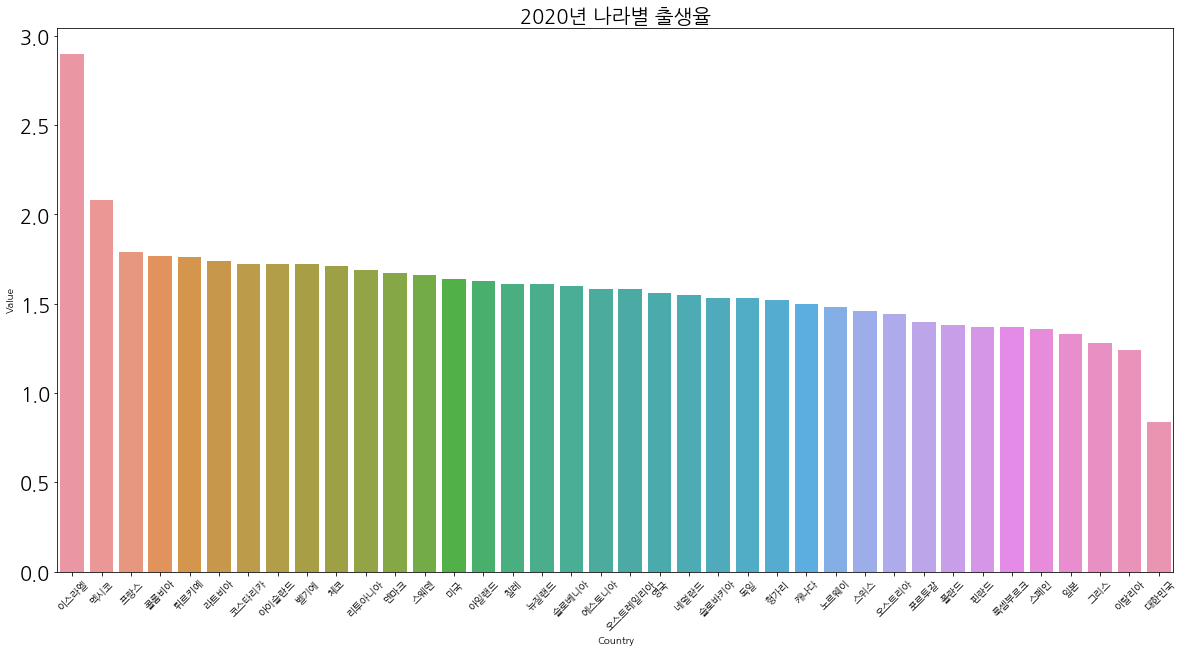

In [314]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.barplot(data=birth_rate.loc[(birth_rate.Year==2020)],order=birth_rate.loc[(birth_rate.Year==2020)].sort_values("Value",ascending=False).iloc[:,0],x='Country', y='Value')
plt.title("2020년 나라별 출생율", fontsize=20)

Text(0.5, 1.0, '년도별 출생율')

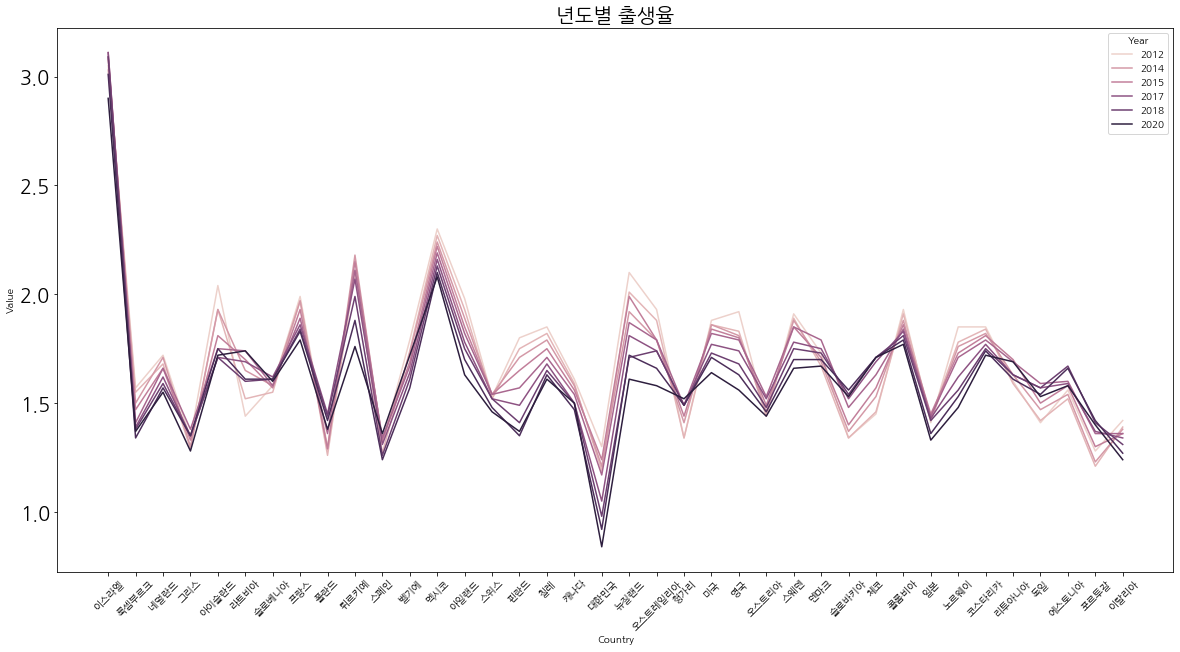

In [315]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.lineplot(data=birth_rate,x='Country', y='Value', hue="Year")
plt.title("년도별 출생율", fontsize=20)

In [316]:
# GDP 데이터
df = pd.read_csv("OECD 국가의 주요지표.csv", encoding= "euc-kr", skiprows = 1)

#column(열) 이름 바꾸기 = 연도
df= df.rename(columns = {'국내총생산(GDP)(당해년 가격) (10억US$)' : '2012'})

for i in range(1,10):
    df = df.rename(columns = {'국내총생산(GDP)(당해년 가격) (10억US$).{}'.format(i): str(2012+i)} )

#row(행) 이름 바꾸기. = 국가
for i in range(len(df)):
    df.rename(index = {i :df.loc[i,'국가별']},inplace = True)

# df.head()

#필요한 GDP 데이터만 데이터프레임으로 추출.
#column 이름으로 추출.
col_name = []
for i in range(2012,2021):
    col_name.append(str(i))

GDP_df = df[col_name]

#NaN 값 제거.
GDP_df.drop(GDP_df.index[0], inplace= True)
GDP_df.dropna(inplace=True)

#OECD 총값 제거.
GDP_df.drop(GDP_df.tail(1).index,inplace=True)

#빈값, 잘못된 값 찾기
col = GDP_df.columns.values

index = GDP_df.index.values
outlier = {}
for i in index:
    for c in col:
        if (GDP_df.loc[i,str(c)] == '-'):
            outlier[c] = i
#빈값, 잘못된 값을 각 국의 평균값으로 대체.
sum = 0
for key in outlier.keys():
    sum = 0
    for c in col:
        if (c == key):
            continue
        else:
            sum += float(GDP_df.loc[outlier.get(key),str(c)])
    GDP_df.loc[outlier.get(key), key] = round(sum/(len(col)-len(outlier)),1)

C:\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\anaconda\lib\site-pa

In [317]:
#데이터 새로 생성
new = pd.DataFrame({"Country":[],"Year":[],"GDP":[]})
for country in range (0,len(GDP_df)):
    for year in range (0,9):
        new.loc[len(new)] = [GDP_df.index[country],GDP_df.columns[year],float(GDP_df.iloc[country,year])]
new["Year"] = pd.to_datetime(new["Year"]).dt.year
new

,Country,Year,GDP
0,대한민국,2012,1278.0
1,대한민국,2013,1370.6
2,대한민국,2014,1484.0
3,대한민국,2015,1465.3
4,대한민국,2016,1500.0
...,...,...,...
337,뉴질랜드,2016,188.9
338,뉴질랜드,2017,207.0
339,뉴질랜드,2018,212.2
340,뉴질랜드,2019,209.1


In [318]:
#출산율, gdp 데이터 merge
data = pd.merge(new, birth_rate)
data.rename(columns={"Value" : "Birth"}, inplace=True)
data

,Country,Year,GDP,Birth
0,대한민국,2012,1278.0,1.30
1,대한민국,2013,1370.6,1.19
2,대한민국,2014,1484.0,1.21
3,대한민국,2015,1465.3,1.24
4,대한민국,2016,1500.0,1.17
...,...,...,...,...
337,뉴질랜드,2016,188.9,1.87
338,뉴질랜드,2017,207.0,1.81
339,뉴질랜드,2018,212.2,1.71
340,뉴질랜드,2019,209.1,1.72


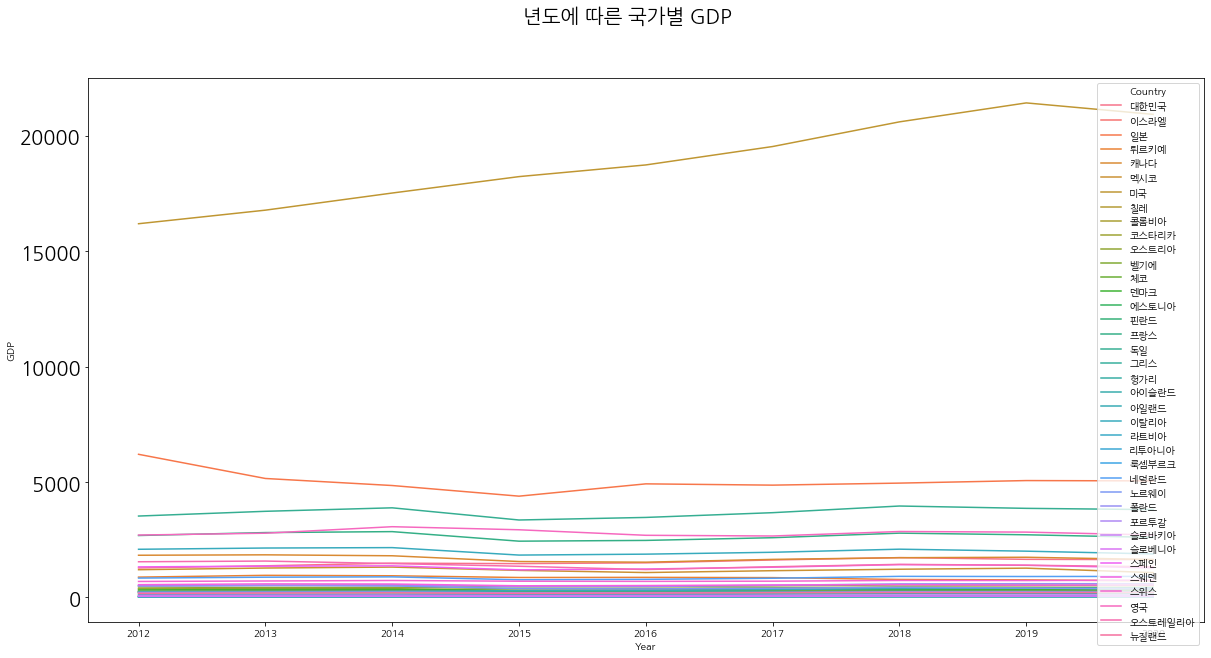

In [319]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=data, x=data.Year, y=data.GDP, hue=data.Country)
plt.suptitle("년도에 따른 국가별 GDP", fontsize= 20)
plt.show()

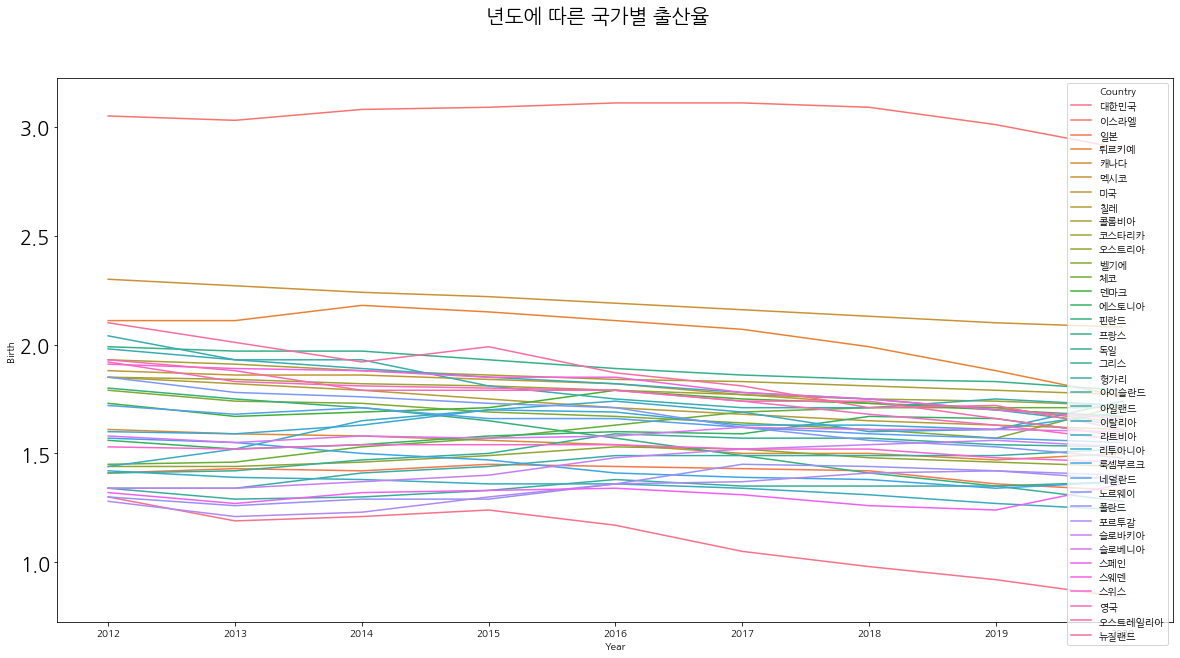

In [320]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=data, x=data.Year, y=data.Birth, hue=data.Country)
plt.suptitle("년도에 따른 국가별 출산율", fontsize= 20)
plt.show()

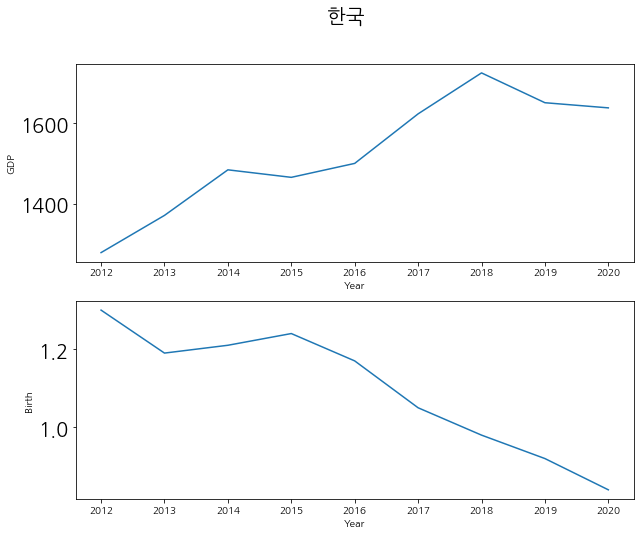

In [321]:
#한국의 GDP와 출산율 그래프
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
sns.lineplot(x=data.loc[(data.Country=="대한민국"), "Year"], y=data.loc[(data.Country=="대한민국"), "GDP"])
plt.subplot(2,1,2)
sns.lineplot(x=data.loc[(data.Country=="대한민국"), "Year"], y=data.loc[(data.Country=="대한민국"), "Birth"])
plt.suptitle("한국", fontsize= 20)
plt.show()

In [343]:
for i in range(0,38):
    r, p = stats.pearsonr(data.loc[(data.Country==data.iloc[i*9,0]),"Birth"], data.loc[(data.Country==data.iloc[i*9,0]),"GDP"])
    country.loc[i] = [data.iloc[i*9,0],r,p]
country


#년도 별 상관계수
year = pd.DataFrame({"Year":[],"상관계수":[],"p-value":[]})

for i in range(0,9):
    r, p = stats.pearsonr(data.loc[(data.Year==2012+i),"Birth"], data.loc[(data.Year==2012+i),"GDP"])
    year.loc[i] = [int(2012+i),r,p]
year

,Year,상관계수,p-value
0,2012.0,0.022321,0.894182
1,2013.0,0.044375,0.791365
2,2014.0,0.040979,0.807017
3,2015.0,0.041445,0.804866
4,2016.0,0.027967,0.867626
5,2017.0,0.012691,0.939720
6,2018.0,0.000864,0.995890
7,2019.0,-0.001962,0.990674
8,2020.0,-0.036309,0.828660


In [331]:
#한국 상관계수?
print(np.corrcoef(data.loc[(data.Country=="대한민국"),"Birth"], data.loc[(data.Country=="대한민국"),"GDP"])[0,1])

-0.8608633072120296


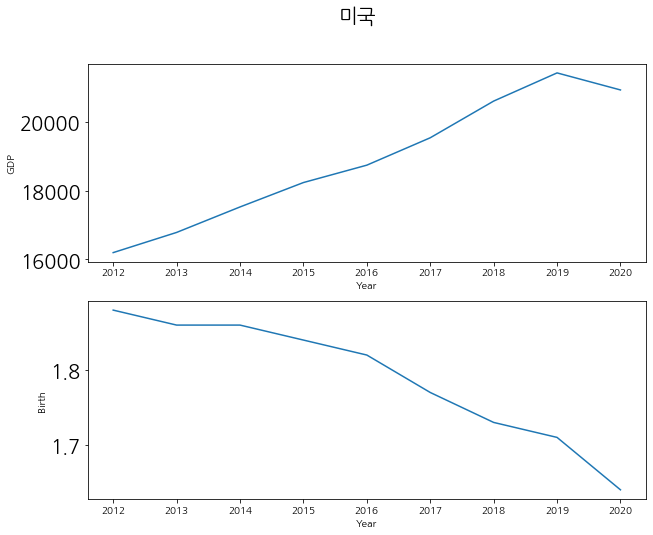

-0.9320234117959888


In [342]:
#한국의 GDP와 출산율 그래프
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
plt
sns.lineplot(x=data.loc[(data.Country=="미국"), "Year"], y=data.loc[(data.Country=="미국"), "GDP"])
plt.subplot(2,1,2)
sns.lineplot(x=data.loc[(data.Country=="미국"), "Year"], y=data.loc[(data.Country=="미국"), "Birth"])
plt.suptitle("미국", fontsize= 20)
plt.show()

print(np.corrcoef(data.loc[(data.Country=="미국"),"Birth"], data.loc[(data.Country=="미국"),"GDP"])[0,1])

In [333]:
#국가 별 상관계수
country = pd.DataFrame({"Country":[],"상관계수":[],"p-value":[]})

for i in range(0,38):
    r, p = stats.pearsonr(data.loc[(data.Country==data.iloc[i*9,0]),"Birth"], data.loc[(data.Country==data.iloc[i*9,0]),"GDP"])
    country.loc[i] = [data.iloc[i*9,0],r,p]
country

,Country,상관계수,p-value
0,대한민국,-0.860863,0.002880
1,이스라엘,-0.461560,0.211059
2,일본,-0.233176,0.545977
3,튀르키예,0.897980,0.001009
4,캐나다,0.402302,0.283081
5,멕시코,0.355489,0.347798
6,미국,-0.932023,0.000252
7,칠레,-0.163497,0.674258
8,콜롬비아,0.729862,0.025596
9,코스타리카,-0.938189,0.000182


In [334]:
year

8